In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [5]:
airlines=pd.read_csv("https://raw.githubusercontent.com/sfarhan79/datasets/main/python%20datasets/csv/east%20west%20airlines.csv")
airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [6]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
airline=airlines.drop(["ID#"],axis=1)
airline.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [8]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss_df=pd.DataFrame(ss.fit_transform(airline),columns=airline.columns)
ss_df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [9]:
km=KMeans(n_clusters=5,random_state=42)
km.fit(ss_df)

KMeans(n_clusters=5, random_state=42)

In [10]:
set(km.labels_)

{0, 1, 2, 3, 4}

In [11]:
airline["cluster_ID"]=km.labels_
airline

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_ID
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [12]:
airline.sort_values(by="cluster_ID")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_ID
3485,12134,899,4,1,1,57676,25,3064,9,974,1,0
3165,194816,0,1,1,1,20822,25,6647,12,2424,1,0
220,1302051,2706,5,1,1,90653,32,3050,7,7467,1,0
2732,109441,0,1,1,1,6500,10,4000,8,2237,1,0
3182,26650,0,1,1,1,4652,11,4652,11,1958,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1917,82981,0,5,1,3,105325,44,1000,2,3964,1,4
850,25629,0,4,1,5,107308,36,600,2,5966,1,4
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,4
1036,154664,0,4,1,3,73881,33,0,0,5769,0,4


In [13]:
airline.groupby("cluster_ID").agg(["mean"]).reset_index()

,cluster_ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,188455.641176,961.558824,2.194118,1.000000,1.000000,30945.770588,26.111765,5277.958824,15.258824,4678.300000,0.800000
1,1,44293.077409,98.530806,1.237362,1.000000,1.000395,4722.390205,6.885861,196.838468,0.614929,3699.326619,0.202607
2,2,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
3,3,117119.906376,130.094431,3.736077,1.000000,1.001614,39793.209040,18.843422,332.092010,0.987086,4897.692494,0.651332
4,4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [14]:
airline.cluster_ID.value_counts()

1    2532
3    1239
0     170
2      43
4      15
Name: cluster_ID, dtype: int64

In [15]:
airline[airline["cluster_ID"]==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_ID
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
5,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3974,0,1,1,1,365,3,0,0,1397,0,1
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


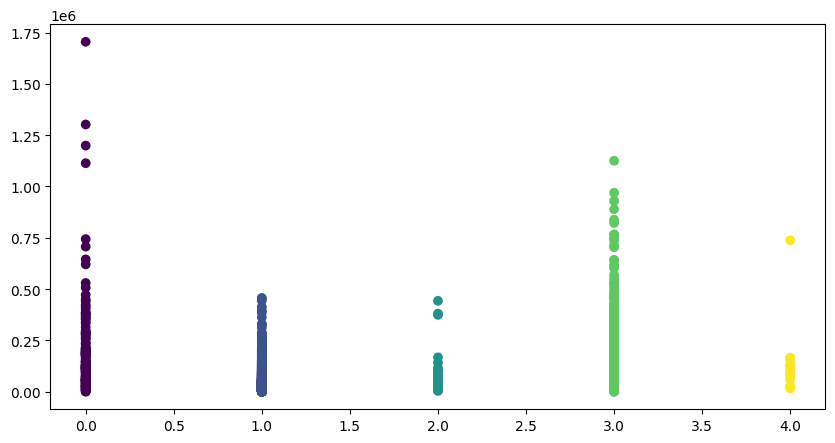

In [16]:
fig=plt.figure(figsize=(10,5))
plt.scatter(airline.cluster_ID,airline.Balance,c=km.labels_)

**Inference:**
As we could see that most of the flyers fall in the range of 10,001-25,000, we can target this segment with mileage offers.

**Heirarchical Clustering**

In [17]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [18]:
air=pd.read_csv("https://raw.githubusercontent.com/sfarhan79/datasets/main/python%20datasets/csv/east%20west%20airlines.csv")
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [19]:
air=air.drop("ID#",axis=1)
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [20]:
air_norm=pd.DataFrame(normalize(air),columns=air.columns)
air_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009


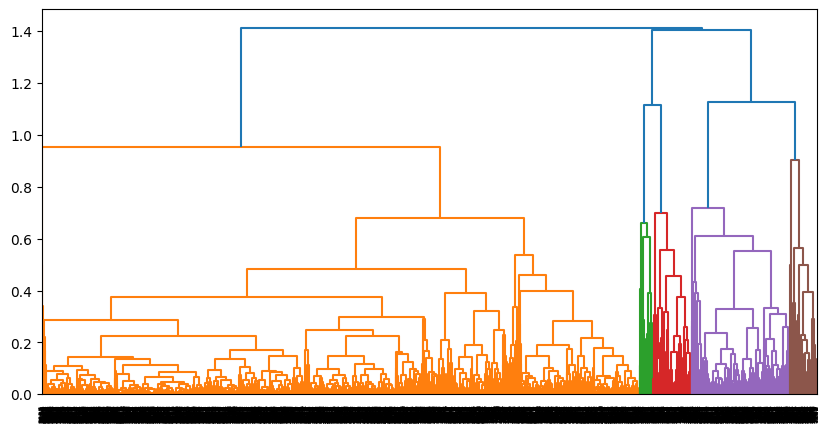

In [32]:
fig=plt.figure(figsize=(10,5))
dend=sch.dendrogram(sch.linkage(air_norm,"complete"))

In [22]:
ac=AgglomerativeClustering(n_clusters=6,metric="euclidean",linkage="ward")
ac

AgglomerativeClustering(metric='euclidean', n_clusters=6)

In [23]:
y=pd.DataFrame(ac.fit_predict(air_norm),columns=["cluster_ID"])
y["cluster_ID"].value_counts()

2    1547
1    1191
3     579
0     453
4     174
5      55
Name: cluster_ID, dtype: int64

In [24]:
air["cluster_ID"]=ac.labels_
air.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_ID
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3


In [26]:
air.sort_values("cluster_ID").tail()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_ID
1212,2278,0,1,1,1,0,0,0,0,5175,0,5
1580,2080,0,1,1,1,0,0,0,0,4635,0,5
1202,2305,0,1,1,1,0,0,0,0,5105,0,5
910,2111,0,1,1,1,100,1,0,0,5962,0,5
3812,891,0,1,1,1,891,8,0,0,1703,0,5


In [28]:
air[air["cluster_ID"]==5].tail()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_ID
3591,500,0,1,1,1,125,1,0,0,1355,0,5
3768,400,0,1,1,1,160,1,0,0,3460,0,5
3798,706,0,1,1,1,730,3,100,1,1739,1,5
3812,891,0,1,1,1,891,8,0,0,1703,0,5
3984,404,0,1,1,1,550,3,0,0,1418,0,5


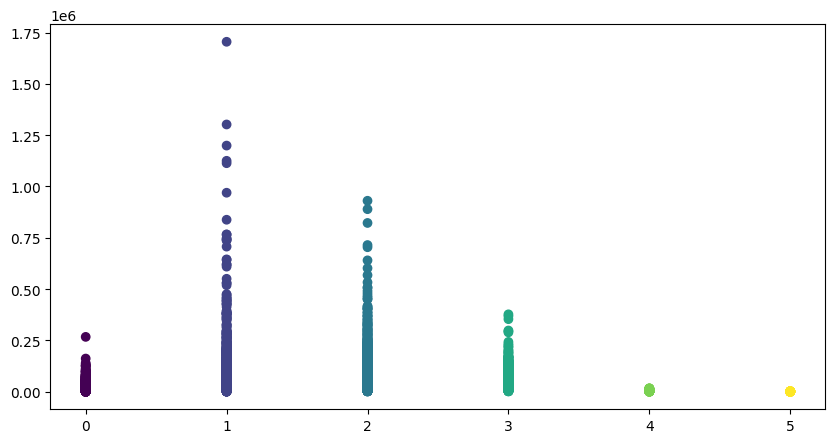

In [30]:
fig=plt.figure(figsize=(10,5))
plt.scatter(air["cluster_ID"],air["Balance"],c=ac.labels_)

**KMeans**

In [33]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [35]:
airlyn=pd.read_csv("https://raw.githubusercontent.com/sfarhan79/datasets/main/python%20datasets/csv/east%20west%20airlines.csv")
airlyn.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [36]:
airlyn=airlyn.drop("ID#",axis=1)
airlyn.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [37]:
scaler=StandardScaler()
scaler_df=pd.DataFrame(scaler.fit_transform(airlyn),columns=airlyn.columns)
scaler_df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [38]:
kmn=KMeans(n_clusters=7,random_state=37)
kmn.fit(scaler_df)

KMeans(n_clusters=7, random_state=37)

In [39]:
set(kmn.labels_)

{0, 1, 2, 3, 4, 5, 6}

In [42]:
airlyn["cluster_ID"]=kmn.labels_
airlyn.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_ID
0,28143,0,1,1,1,174,1,0,0,7000,0,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [44]:
airlyn.sort_values("cluster_ID").tail()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_ID
198,8669,0,1,3,1,11397,16,0,0,7486,1,6
2166,100634,0,1,3,1,69669,28,1540,12,4193,1,6
226,117329,0,1,2,1,6448,11,0,0,7416,1,6
3359,20318,0,1,2,1,6990,13,0,0,1956,0,6
3367,23197,0,1,3,1,10587,13,150,1,1747,0,6


In [46]:
airlyn[airlyn["cluster_ID"]==6].tail()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_ID
3779,35850,0,1,3,1,17759,18,0,0,3439,0,6
3788,374613,0,1,2,1,23592,31,5000,14,3463,1,6
3837,8150,0,1,2,1,14135,41,500,2,1676,1,6
3851,11947,0,1,2,1,8099,14,1000,2,1656,1,6
3959,13942,0,1,2,1,5822,12,0,0,1458,0,6


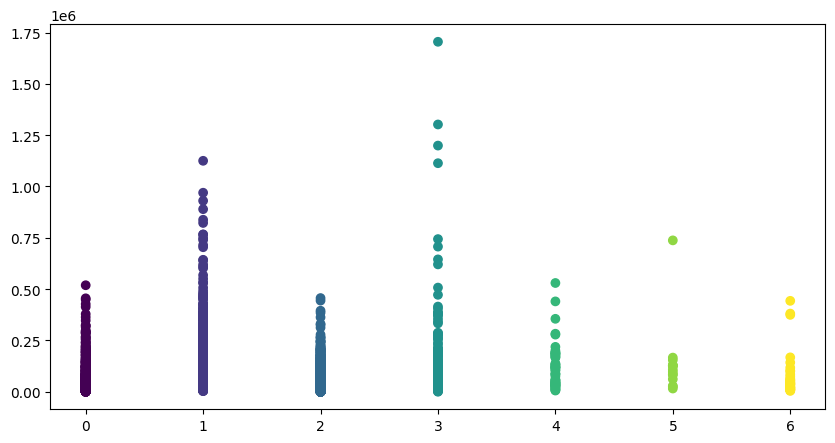

In [47]:
fig=plt.figure(figsize=(10,5))
plt.scatter(airlyn.cluster_ID,airlyn.Balance,c=kmn.labels_)